#### Micah Oeur 
HW1 ASTR220A <br> 
Prof. Ryan Foley <br> 
1/17/23

## Problem 1

In [1]:
import mesa_reader as mr
import numpy as np
import matplotlib.pyplot as plt

## (b)

In [2]:
p3 = mr.MesaData('LOGS_to_end_core_h_burn/profile3.data')
p1 = mr.MesaData('LOGS_to_end_core_h_burn/profile1.data')

In [3]:
#temperatures = 10 ** p.logT

Text(0.5, 1.0, '$\\rho-T$ at TAMS')

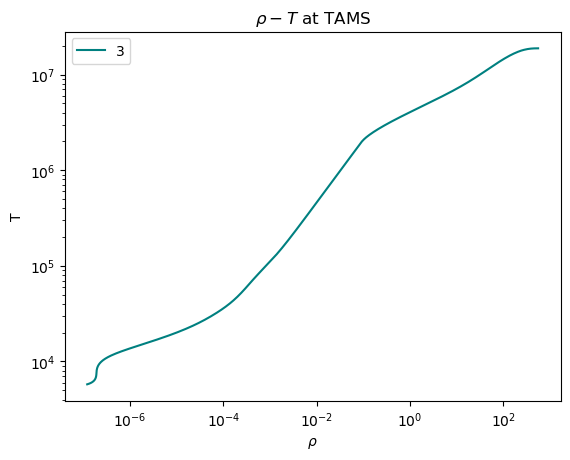

In [4]:
plt.loglog(p3.Rho, p3.T, c='teal', label='3')
#plt.loglog(p1.Rho, p1.T, c='grey', label='1')
plt.legend()
plt.xlabel(r'$\rho$')
plt.ylabel("T")
plt.title(r'$\rho-T$ at TAMS')

## (c)

Text(0.5, 1.0, 'Abundance Profiles at TAMS')

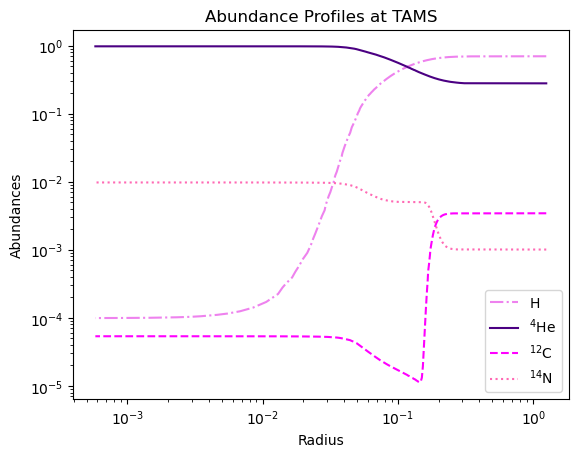

In [6]:
plt.loglog(p3.radius, p3.h1, ls='-.', c='violet', label='H')
plt.loglog(p3.radius, p3.he4, c='indigo', label=r'$^{4}$He')
plt.loglog(p3.radius, p3.c12, ls='dashed', c='magenta', label=r'$^{12}$C')
plt.loglog(p3.radius, p3.n14, ls='dotted', c='hotpink', label=r'$^{14}$N')
plt.legend()
plt.xlabel('Radius')
plt.ylabel("Abundances")
plt.title('Abundance Profiles at TAMS')

Hydrogen in the core gets depleted as the star evolves on the MS. The helium core grows as hydrogen is fused into helium to produce energy & the star becomes more luminous. Stars above 1.5 solar masses produce their energy by the CNO cycle, which is where "metals", elements heavier than hydrogen and helium -- like carbon and nitrogen -- come from.

In [7]:
pZAMS = mr.MesaData('LOGS_start/profile1.data')

Text(0.5, 1.0, 'Abundance Profiles at ZAMS')

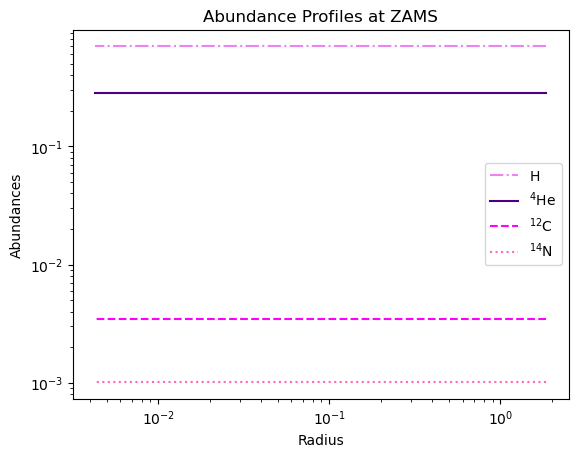

In [8]:
plt.loglog(pZAMS.radius, pZAMS.h1, ls='-.', c='violet', label='H')
plt.loglog(pZAMS.radius, pZAMS.he4, c='indigo', label=r'$^{4}$He')
plt.loglog(pZAMS.radius, pZAMS.c12, ls='dashed', c='magenta', label=r'$^{12}$C')
plt.loglog(pZAMS.radius, pZAMS.n14, ls='dotted', c='hotpink', label=r'$^{14}$N')
plt.legend()
plt.xlabel('Radius')
plt.ylabel("Abundances")
plt.title('Abundance Profiles at ZAMS')

## (a)

In [9]:
h = mr.MesaData('LOGS_to_end_core_h_burn/history.data')

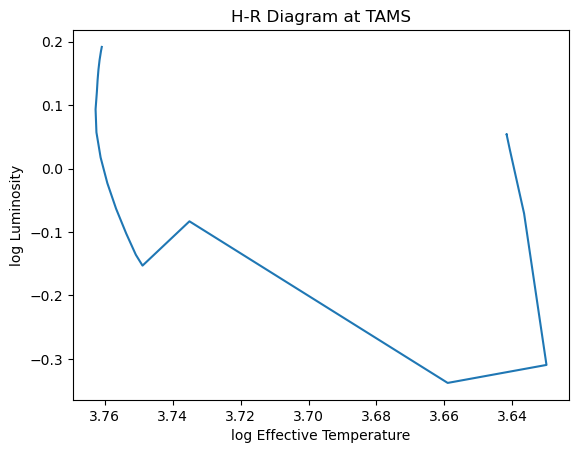

In [10]:
plt.plot(h.log_Teff, h.log_L)
plt.xlabel('log Effective Temperature')
plt.ylabel('log Luminosity')
plt.title('H-R Diagram at TAMS')

# invert the x-axis
plt.gca().invert_xaxis()

## Problem 2

ADL Query:
SELECT TOP 2000 gaia_source.source_id,gaia_source.ra,gaia_source.dec,gaia_source.parallax,gaia_source.pmra,gaia_source.pmdec,gaia_source.ruwe,gaia_source.phot_g_mean_mag,gaia_source.bp_rp,gaia_source.radial_velocity,gaia_source.phot_variable_flag,gaia_source.non_single_star,gaia_source.has_xp_continuous,gaia_source.has_xp_sampled,gaia_source.has_rvs,gaia_source.has_epoch_photometry,gaia_source.has_epoch_rv,gaia_source.has_mcmc_gspphot,gaia_source.has_mcmc_msc,gaia_source.teff_gspphot,gaia_source.logg_gspphot,gaia_source.mh_gspphot,gaia_source.distance_gspphot,gaia_source.azero_gspphot,gaia_source.ag_gspphot,gaia_source.ebpminrp_gspphot
FROM gaiadr3.gaia_source 
WHERE 
CONTAINS(
	POINT('ICRS',gaiadr3.gaia_source.ra,gaiadr3.gaia_source.dec),
	CIRCLE(
		'ICRS',
		COORD1(EPOCH_PROP_POS(132.846,11.814,1.1325,-10.9737,-2.9396,33.9200,2000,2016.0)),
		COORD2(EPOCH_PROP_POS(132.846,11.814,1.1325,-10.9737,-2.9396,33.9200,2000,2016.0)),
		2.6666666666666665)
)=1

I typed "M67" in the search box and, since the listed radius is 40 arc mins, I multiplied by 3 to get 120 arc mins as my search radius.

In [11]:
#1673826574757O-result.vot this is the file I downloaded from Gaia Archive

In [12]:
from astropy.io.votable import parse

In [13]:
votable = parse("1673828533945O-result.vot")

In [14]:
table = votable.get_first_table()

In [15]:
table

<Table length=2000>
    source_id              ra                dec               parallax              pmra               pmdec        ... mh_gspphot distance_gspphot azero_gspphot ag_gspphot ebpminrp_gspphot
                          deg                deg                 mas               mas / yr            mas / yr      ...    dex            pc             mag         mag           mag       
      int64             float64            float64             float64             float64             float64       ...  float32       float32         float32     float32       float32     
------------------ ------------------ ------------------ ------------------- ------------------- ------------------- ... ---------- ---------------- ------------- ---------- ----------------
597641606864755456 133.23421476907276  9.866374548970606                  --                  --                  -- ...         --               --            --         --               --
597641611158990720  133.2

In [16]:
data = table.array

In [17]:
len(data) #rows across the table printed above

2000

In [18]:
data[0][2]

9.866374548970606

In [19]:
data[1][2]

9.865965230882106

In [20]:
parallax = [data[x][3] for x in range(2000)]

(-5.0, 5.0)

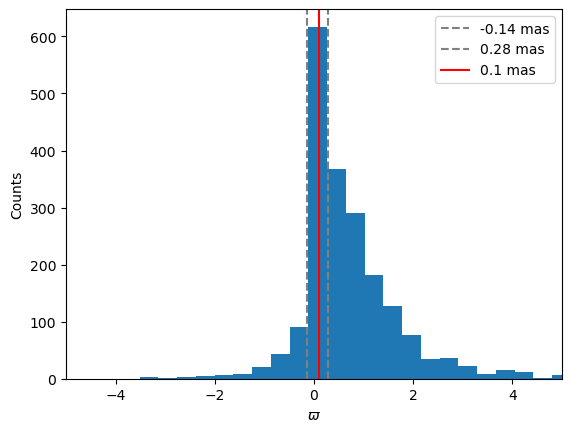

In [21]:
plt.hist(parallax, bins=55)
plt.axvline(-0.14, 0, 610, ls='dashed', c='grey', label='-0.14 mas')
plt.axvline(0.28, 0, 610, ls='dashed', c='grey', label='0.28 mas')
plt.axvline(0.1, 0, 610, c='red', label='0.1 mas')
plt.legend()
#plt.axvline(-0.7, 0, 610, ls='dashed', c='grey', alpha=0.3)
#plt.axvline(0.65, 0, 610, ls='dashed', c='grey', alpha=0.3)
plt.xlabel(r'$\varpi$')
plt.ylabel('Counts')
plt.xlim(-5,5)

Because parallax is the measured displacement in the apparent position of an object viewed along two different lines of sight, zero parallax is no difference in its apparent position from both vantage points.

Distance = $\frac{1}{\varpi}$

3571.43 pc estimated from 0.4mas-width parallax overdensity and +- 4166.67 pc (from using the binwidth of 0.24mas counts)

In [22]:
pmra  = [data[x][4] for x in range(2000)]
pmdec = [data[x][5] for x in range(2000)]

/Users/micahoeur/opt/anaconda3/lib/python3.9/site-packages/numpy/ma/core.py:2829: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


Text(0, 0.5, '$\\mu_{DEC}$')

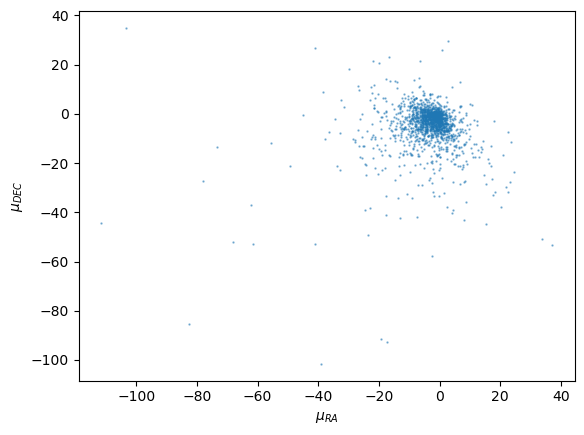

In [23]:
plt.scatter(pmra, pmdec, s=0.5, alpha=0.5)
#plt.axvline(0, -100, 40, ls='dashed', c='red', alpha=0.3)
#plt.axhline(0, -120, 43, ls='dashed', c='red', alpha=0.3)
plt.xlabel(r'$\mu_{RA}$')
plt.ylabel(r'$\mu_{DEC}$')
#plt.xlim(-100, 40)
#plt.ylim(-100, 40)

Plot MG as a function of (BP - RP), where MG is the absolute magnitude in the Gaia G band and (BP - RP) is the Gaia blue minus red color.

In [24]:
dist = [data[x][22] for x in range(2000)]

Text(0, 0.5, 'Counts')

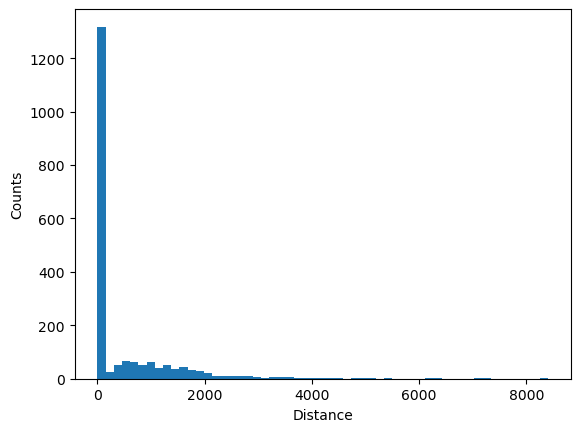

In [25]:
plt.hist(dist, bins=55)
plt.xlabel('Distance')
plt.ylabel('Counts')

In [26]:
den, xes1, yes1  = np.histogram2d(pmra, pmdec, range=[[-10, 10], [-10, 10]], bins=40) 

/Users/micahoeur/opt/anaconda3/lib/python3.9/site-packages/numpy/core/shape_base.py:121: UserWarning: Warning: converting a masked element to nan.
  ary = asanyarray(ary)


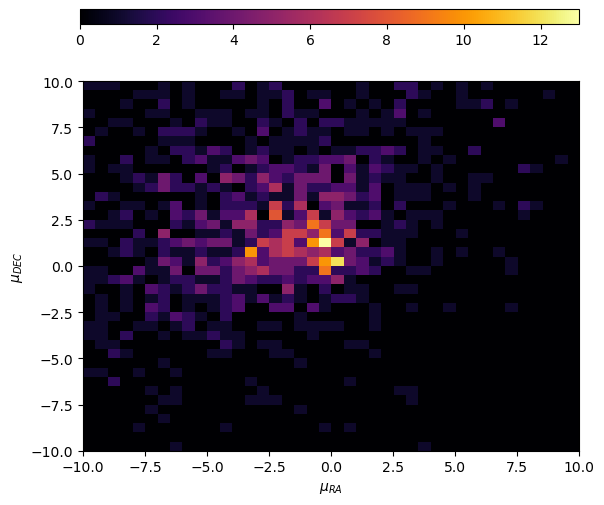

In [27]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
img = ax1.imshow(den, extent = [-10, 10, -10, 10], aspect='auto', cmap=plt.cm.get_cmap('inferno'))
plt.xlabel(r'$\mu_{RA}$')
plt.ylabel(r'$\mu_{DEC}$')
cbaxes = fig.add_axes([0.12, 1.0, 0.78, 0.03])
cbar = plt.colorbar(img, cax=cbaxes, orientation='horizontal')

Plotted values masked by density

In [28]:
#pm_mask=np.ma.masked_where(den < 2, den)
#fig = plt.figure()
#ax1 = fig.add_subplot(111)
#img = ax1.imshow(pm_mask, extent = [-10, 10, -10, 10], aspect='auto', cmap=plt.cm.get_cmap('inferno'))
#plt.xlabel(r'$\mu_{RA}$')
#plt.ylabel(r'$\mu_{DEC}$')
#cbaxes = fig.add_axes([0.12, 1.0, 0.78, 0.03])
#cbar = plt.colorbar(img, cax=cbaxes, orientation='horizontal')

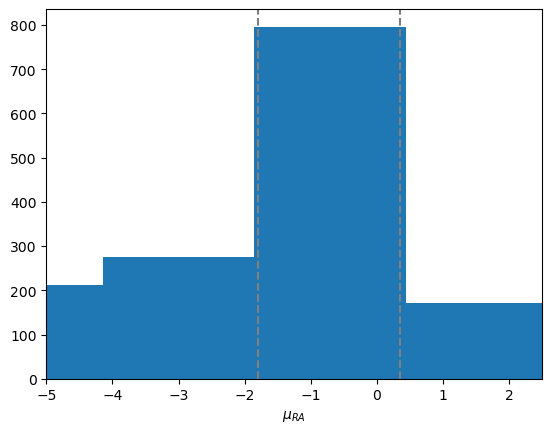

In [29]:
plt.hist(pmra, bins=65)
plt.xlabel(r'$\mu_{RA}$')
plt.xlim(-5, 2.5)
plt.axvline(-1.8, 0, 800, ls='dashed', c='grey')
plt.axvline(0.35, 0, 800, ls='dashed', c='grey')

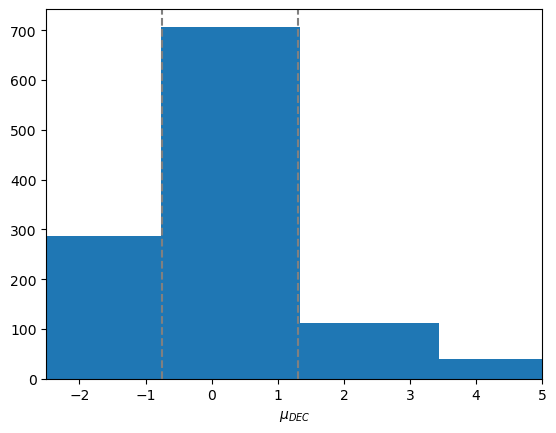

In [30]:
plt.hist(pmdec, bins=65)
plt.xlabel(r'$\mu_{DEC}$')
plt.xlim(-2.5, 5)
plt.axvline(-0.75, 0, 700, ls='dashed', c='grey')
plt.axvline(1.3, 0, 700, ls='dashed', c='grey')

In [31]:
pmra_arr = np.array(pmra)
pmdec_arr = np.array(pmdec)

/var/folders/dd/g49g6w0x69b78hzg9rs8kn7m0000gn/T/ipykernel_32499/145870821.py:1: UserWarning: Warning: converting a masked element to nan.
  pmra_arr = np.array(pmra)
/var/folders/dd/g49g6w0x69b78hzg9rs8kn7m0000gn/T/ipykernel_32499/145870821.py:2: UserWarning: Warning: converting a masked element to nan.
  pmdec_arr = np.array(pmdec)


In [32]:
subselection_pm = np.where((pmra_arr < 0.35) & (pmra_arr > -1.8) & (pmdec_arr < 1.3) & (pmdec_arr > -0.75))

In [33]:
subpmra = pmra_arr[subselection_pm]
subpmdec = pmdec_arr[subselection_pm]

In [34]:
len(subpmra), len(subpmdec)

(108, 108)

Text(0.5, 1.0, '108 M67 stars clustered in pm')

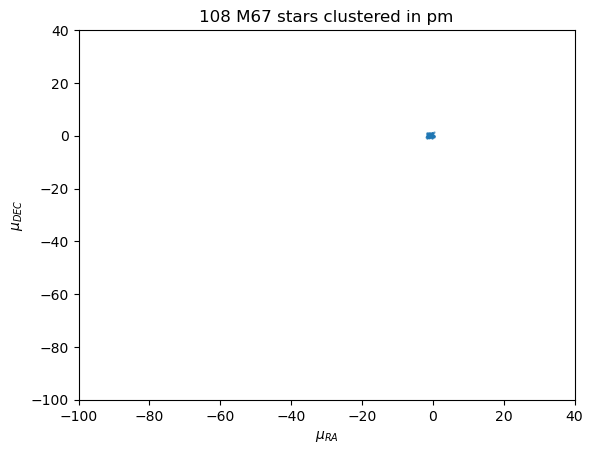

In [35]:
plt.scatter(subpmra, subpmdec, s=0.5, alpha=0.5)
plt.xlabel(r'$\mu_{RA}$')
plt.ylabel(r'$\mu_{DEC}$')
plt.xlim(-100, 40)
plt.ylim(-100, 40)
plt.title('108 M67 stars clustered in pm')

Text(0.5, 1.0, '108 M67 stars clustered in pm')

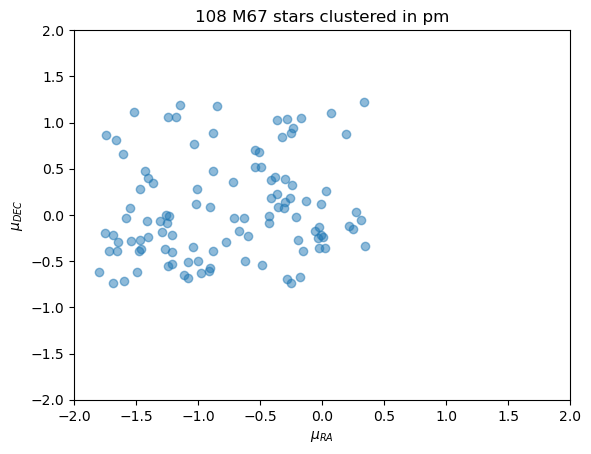

In [36]:
plt.scatter(subpmra, subpmdec, alpha=0.5)
plt.xlabel(r'$\mu_{RA}$')
plt.ylabel(r'$\mu_{DEC}$')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title('108 M67 stars clustered in pm')

Text(0.5, 1.0, 'M67 Stars Clustered in Proper Motions')

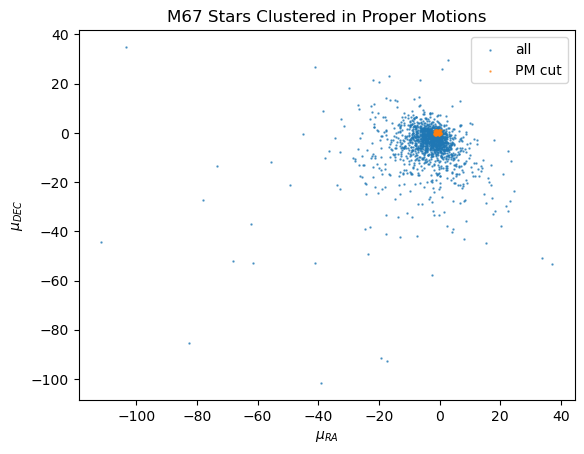

In [37]:
plt.scatter(pmra, pmdec, s=0.5, alpha=0.7, label='all')
plt.scatter(subpmra, subpmdec, s=0.5, alpha=0.7, label='PM cut')
plt.legend()
plt.xlabel(r'$\mu_{RA}$')
plt.ylabel(r'$\mu_{DEC}$')
plt.title('M67 Stars Clustered in Proper Motions')

In [38]:
para_arr = np.array(parallax)

/var/folders/dd/g49g6w0x69b78hzg9rs8kn7m0000gn/T/ipykernel_32499/1238556725.py:1: UserWarning: Warning: converting a masked element to nan.
  para_arr = np.array(parallax)


In [39]:
subpara = para_arr[subselection_pm]

Text(0.5, 23, 'Distance = 3333.33 pc')

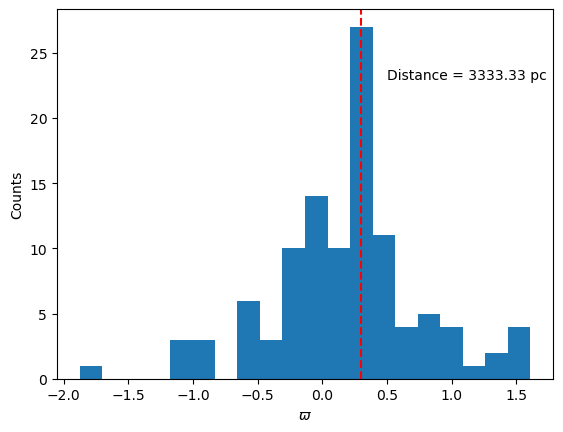

In [40]:
plt.hist(subpara, bins=20)
#plt.axvline(-0.2, 0, 610, ls='dashed', c='red')
plt.axvline(0.3, 0, 610, ls='dashed', c='red')
#plt.axhline(628, -7, 16, ls='dashed', c='red', alpha=0.3)

#plt.axvline(-0.7, 0, 610, ls='dashed', c='grey', alpha=0.3)
#plt.axvline(0.65, 0, 610, ls='dashed', c='grey', alpha=0.3)
plt.xlabel(r'$\varpi$')
plt.ylabel('Counts')
plt.text(0.5,23,'Distance = 3333.33 pc')

In [41]:
#index 7 is my y-axis (g band abs mag) and index 8 is bp-rp, my x-axis
#index 22 is distance

In [42]:
Mg   = [data[x][7] for x in range(2000)]
BpRp = [data[x][8] for x in range(2000)]

In [43]:
Mg_arr   = np.array(Mg)
BpRp_arr = np.array(BpRp)

/var/folders/dd/g49g6w0x69b78hzg9rs8kn7m0000gn/T/ipykernel_32499/2268913665.py:1: UserWarning: Warning: converting a masked element to nan.
  Mg_arr   = np.array(Mg)
/var/folders/dd/g49g6w0x69b78hzg9rs8kn7m0000gn/T/ipykernel_32499/2268913665.py:2: UserWarning: Warning: converting a masked element to nan.
  BpRp_arr = np.array(BpRp)


In [44]:
subMg   = Mg_arr[subselection_pm]
subBpRp = BpRp_arr[subselection_pm]

Text(0.5, 1.0, 'CMD for 108 M67 Cluster Stars')

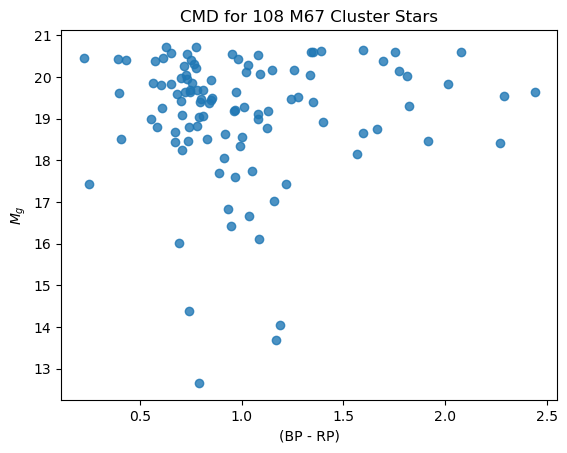

In [45]:
plt.scatter(subBpRp, subMg, alpha=0.8)
plt.xlabel('(BP - RP)')
plt.ylabel(r'$M_{g}$')
plt.title('CMD for 108 M67 Cluster Stars')
#right is bluer and left is redder?
#higher number is fainter and lower number is brighter